In [1]:
from heft import heft, gantt, dag_merge
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import numpy as np

In [2]:
#We need a common heterogeneous system configuration to schedule all 3 graphs on
comm_matrix = heft.readCsvToNumpyMatrix('../test/graph_gen/resource_BW_1.csv')

comp_matrix_1 = heft.readCsvToNumpyMatrix('../test/graph_gen/task_exe_time_1.csv')
dag1 = heft.readDagMatrix('../test/graph_gen/task_connectivity_1.csv')

comp_matrix_2 = heft.readCsvToNumpyMatrix('../test/graph_gen/task_exe_time_2.csv')
dag2 = heft.readDagMatrix('../test/graph_gen/task_connectivity_2.csv')

#comp_matrix_3 = heft.readCsvToNumpyMatrix('../test/graph_gen/task_exe_time_3.csv')
#dag3 = heft.readDagMatrix('../test/graph_gen/task_connectivity_3.csv')

comp_matrix_4 = heft.readCsvToNumpyMatrix('../test/graph_gen/task_exe_time_4.csv')
dag4 = heft.readDagMatrix('../test/graph_gen/task_connectivity_4.csv')

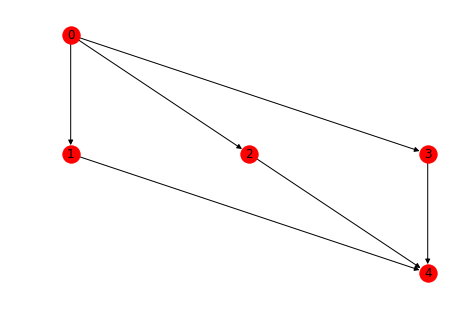

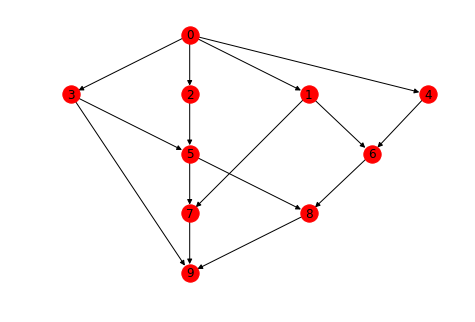

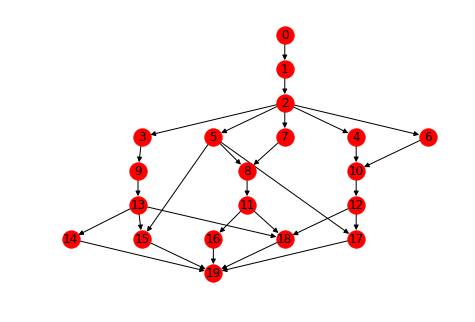

In [3]:
nx.draw(dag1, pos=nx.nx_pydot.graphviz_layout(dag1, prog='dot'), with_labels=True)
plt.show()
nx.draw(dag2, pos=nx.nx_pydot.graphviz_layout(dag2, prog='dot'), with_labels=True)
plt.show()
#nx.draw(dag3, pos=nx.nx_pydot.graphviz_layout(dag3, prog='dot'), with_labels=True)
#plt.show()
nx.draw(dag4, pos=nx.nx_pydot.graphviz_layout(dag4, prog='dot'), with_labels=True)
plt.show()

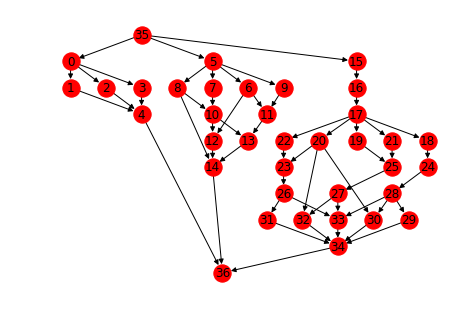

In [4]:
#combined_dag = dag_merge.merge_dags(dag1, dag2, dag3, dag4, merge_method=dag_merge.MergeMethod.COMMON_ENTRY_EXIT)
combined_dag = dag_merge.merge_dags(dag1, dag2, dag4, merge_method=dag_merge.MergeMethod.COMMON_ENTRY_EXIT)
nx.draw(combined_dag, pos=nx.nx_pydot.graphviz_layout(combined_dag, prog='dot'), with_labels=True)
plt.show()

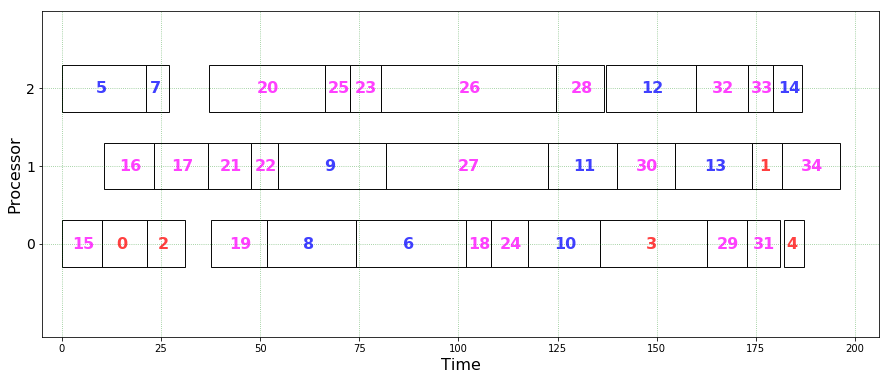

In [18]:
expanded_comp_matrix = np.vstack((comp_matrix_1, comp_matrix_2, comp_matrix_4, np.zeros((2, comp_matrix_1.shape[1]))))

proc_schedules, _, _ = heft.schedule_dag(combined_dag, communication_matrix=comm_matrix, computation_matrix=expanded_comp_matrix)

processors = list(proc_schedules.keys())
color_choices = ['red', 'blue', 'green', 'cyan', 'magenta']

def choose_color(idx):
    if idx < 5:
        return 'red'
    if idx < 15:
        return 'blue'
    if idx < 35:
        return 'magenta'
    #if idx < 50:
    #    return 'magenta'

ilen=len(processors)
pos = np.arange(0.5,ilen*0.5+0.5,0.5)
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
for idx, proc in enumerate(processors):
    for job in proc_schedules[proc]:
        if job.task == 35 or job.task == 36:
            continue
        ax.barh((idx*0.5)+0.5, job.end - job.start, left=job.start, height=0.3, align='center', edgecolor='black', color='white', alpha=0.95)
        ax.text(0.5 * (job.start + job.end - len(str(job.task))-3), (idx*0.5)+0.5 - 0.03125, job.task, color=choose_color(job.task), fontweight='bold', fontsize=16, alpha=0.75)
        #ax.text(7, (idx*0.5)+0.5 - 0.03125, job.task, color=choose_color(job.task), fontweight='bold', fontsize=16, alpha=0.75)

locsy, labelsy = plt.yticks(pos, processors)
plt.ylabel('Processor', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.setp(labelsy, fontsize = 14)
ax.set_ylim(ymin = -0.1, ymax = ilen*0.5+0.5)
ax.set_xlim(xmin = -5)
ax.grid(color = 'g', linestyle = ':', alpha=0.5)

font = font_manager.FontProperties(size='small')
plt.show()